# Domain: Healthcare
● Exploratory Data Analysis <br>
● Practicing statistics using Python <br>
● Hypothesis testing <br>

# Context:
Leveraging customer information is paramount for most
businesses. In the case of an insurance company, attributes of
customers like the ones mentioned below can be crucial in
making business decisions. Hence, knowing to explore and
generate value out of such data can be an invaluable skill to
have.

## Attribute Information:
age : age of primary beneficiary
<br>
sex : insurance contractor gender, female, male <br>
bmi : Body mass index, providing an understanding of body,<br>
weights that are relatively high or low relative to height,<br>
objective index of body weight (kg / m ^ 2) using the ratio of
height to weight, ideally 18.5 to 24.9<br>
children : Number of children covered by health insurance /
Number of dependents<br>
smoker : Smoking<br>
region : the beneficiary's residential area in the US, northeast,
southeast, southwest, northwest.<br>
charges : Individual medical costs billed by health insurance.<br>

### Import the necessary libraries

In [35]:
import pandas as pd # To deal with data frame and reading the data file 
import numpy as np  # To deal with arrays 
import seaborn as sns  # For effective visualization
import scipy.stats as stats # For various satisticall uses

### Read the data as a data frame

In [36]:
 # Reading the data file as dataframe through pandas 
df = pd.read_csv ('insurance.csv')

# To check whearthe data is load properly or not 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Basic EDA
<br>
<br>
Perform basic EDA and print out your insights at every step.

### Shape of the data
- checking the shape of data


In [37]:
print (df.shape) 

(1338, 7)


### Data type of each attribute
- checking data type of each coloumn


In [38]:
# For checking the data type of each coloumn 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


### Checking the presence of missing values
- checking the number of missing values and replace/eliminate them if found


In [39]:
# To check missing values Or NAN 
print (df.isnull().sum())
print ('No missing values is found ')

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
No missing values is found 


### 5 point summary of numerical attributes


In [40]:
# Transpose is done to check our data's five point summary in more effective way 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.


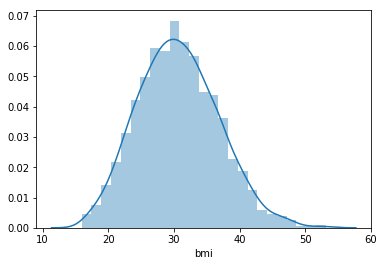

In [41]:
sns.distplot(df['bmi']);

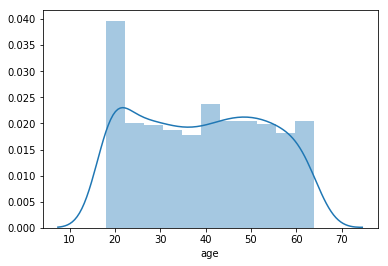

In [42]:
sns.distplot(df['age']);

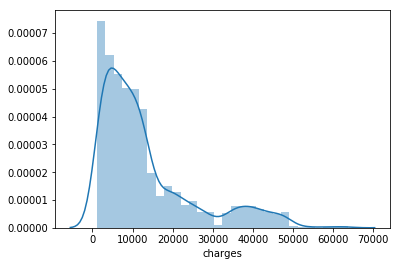

In [43]:
sns.distplot(df['charges']);

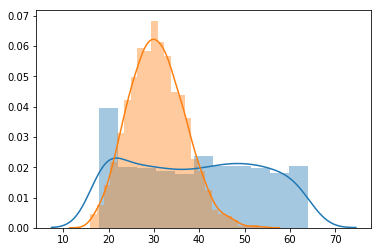

In [44]:
# Distplot of "charges" is left out because it's values are to high as compared to other coloumns 
df1 = df[['age','bmi']]
for col in df1.columns:
  sns.distplot(df1[[col]])

### Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns


In [45]:
# To check skewness we can use directly the skew function available in stats libray
from scipy.stats import skew
print ("skewness of 'bmi' is     =  "+str(skew(df['bmi'])))
print ("skewness of 'age' is     =  "+str(skew(df['age'])))
print ("skewness of 'charges' is =  "+str(skew(df['charges'])))

skewness of 'bmi' is     =  0.28372857291709386
skewness of 'age' is     =  0.055610083072599126
skewness of 'charges' is =  1.5141797118745743


### Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
-  checking the outliers programatically and visually


In [46]:
# To check outliers index we can write a def function for it and we can visualise the same by using boxplot 
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    i = np.where((ys > upper_bound) | (ys < lower_bound))
    return i 


  Outliers in 'bmi'coloumn are on indices  =   (array([ 116,  286,  401,  543,  847,  860, 1047, 1088, 1317], dtype=int64),)
AxesSubplot(0.125,0.125;0.775x0.755)


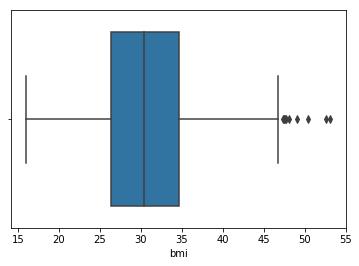

In [47]:
print  ("  Outliers in 'bmi'coloumn are on indices  =   "+ str(outliers_iqr ( df['bmi'])))
print(sns.boxplot(df['bmi']))


  Outliers in 'age'coloumn  are on indices  =   (array([], dtype=int64),)
AxesSubplot(0.125,0.125;0.775x0.755)


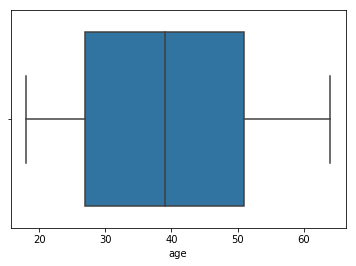

In [48]:
print  ("  Outliers in 'age'coloumn  are on indices  =   "+ str(outliers_iqr ( df['age'])))
print(sns.boxplot(df['age']))


  Outliers in 'charges'coloumn  are on indices  =   (array([  14,   19,   23,   29,   30,   34,   38,   39,   49,   53,   55,
         82,   84,   86,   94,  109,  123,  146,  158,  161,  175,  185,
        203,  223,  240,  242,  251,  252,  254,  256,  263,  265,  271,
        281,  288,  292,  298,  312,  314,  322,  327,  328,  330,  338,
        373,  377,  381,  420,  421,  422,  441,  476,  488,  500,  524,
        530,  543,  549,  558,  569,  577,  587,  609,  615,  621,  623,
        629,  665,  667,  668,  674,  677,  682,  689,  697,  706,  725,
        736,  738,  739,  742,  759,  803,  819,  826,  828,  842,  845,
        850,  852,  856,  860,  883,  893,  901,  917,  947,  951,  953,
        956,  958, 1012, 1021, 1022, 1031, 1036, 1037, 1047, 1049, 1062,
       1070, 1078, 1090, 1096, 1111, 1117, 1118, 1122, 1124, 1139, 1146,
       1152, 1156, 1186, 1206, 1207, 1218, 1230, 1240, 1241, 1249, 1284,
       1288, 1291, 1300, 1301, 1303, 1313, 1323], dtype=int64),)
AxesSu

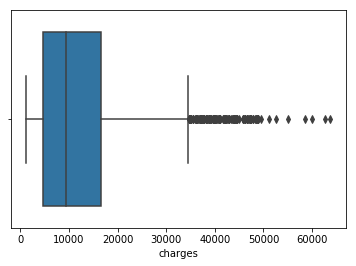

In [49]:
print  ("  Outliers in 'charges'coloumn  are on indices  =   "+ str(outliers_iqr ( df['charges'])))
print(sns.boxplot(df['charges']))

### Distribution of categorical columns (including children)


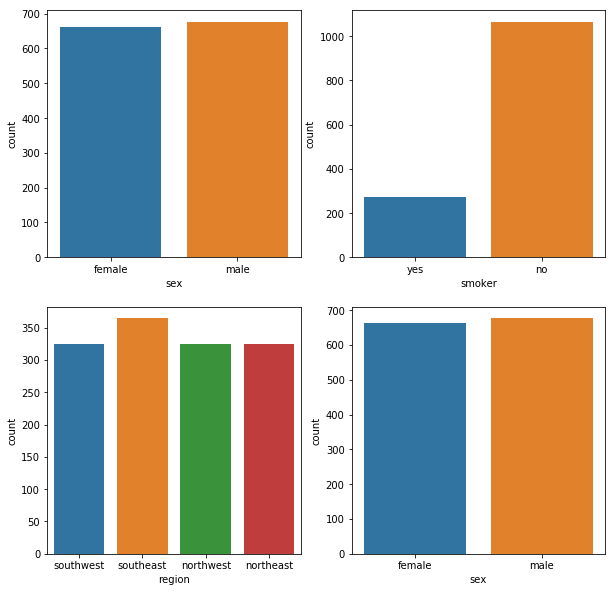

In [50]:
from sklearn import preprocessing
import matplotlib.pyplot as plt # matplotlib is use to create grid like structure for comparision

fig, axs = plt.subplots(figsize=(10,10), ncols=2, nrows=2)
sns.countplot(df['children'], ax=axs[1,1]);
sns.countplot(df['sex'], ax=axs[0,0]);
sns.countplot(df['sex'],ax=axs[1,1])
sns.countplot(df['smoker'],ax=axs[0,1])
sns.countplot(df['region'],ax=axs[1,0]);



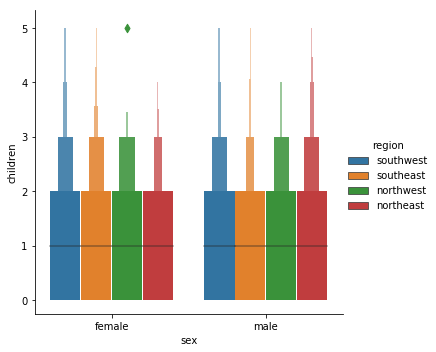

In [51]:
# To visuallise the distribution on one graph for effective understanding 
sns.catplot(x="sex", y="children", hue="region" ,kind="boxen", data=df);

### Pair plot that includes all the columns of the data frame
- for pair plot we need our data coloumns in int or float type hence converting required coloumns 

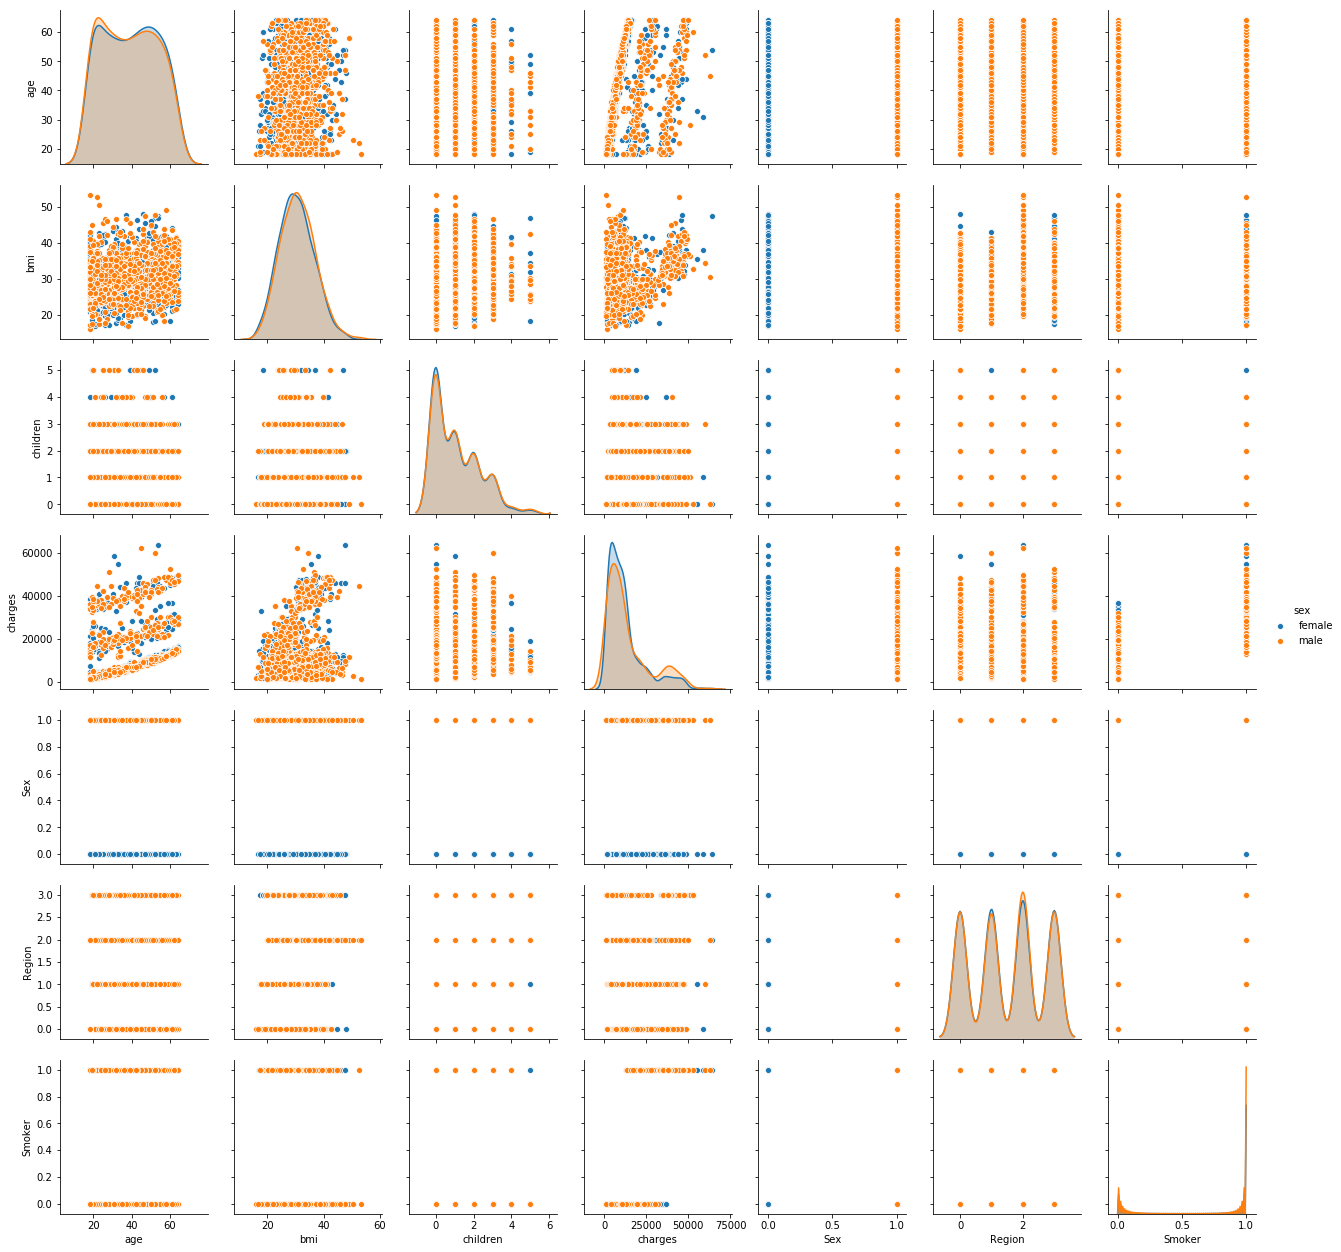

In [52]:
# Pair plot takes all numerical data hence converting all catogorical coloumns by using pre processing library
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'sex','region','smoker'. 
df['Sex']= label_encoder.fit_transform(df['sex']).astype(int)
df['Region']= label_encoder.fit_transform(df['region']).astype(int)
df['Smoker']= label_encoder.fit_transform(df['smoker']).astype(int)
sns.pairplot(df,hue='sex')

## Answer the following questions with statistical evidence

### Do charges of people who smoke differ significantly from the people who don't?

<b>Null Hypothesis "Ho" </b>= Healtcare Charges of people who smoke does not differ significantly from the people who don't <br>
Healthcare mean charges of smoker = Healthcare mean of charges non smoker <br>
<b>Alternate Hypothesis "Ha" </b> = Healthcare Charges of people who smoke differ significantly from the people who don't<br>
Healthcare mean charges of smoker != Healthcare mean of charges non smoker <br>

In [53]:
smoker = df[df['smoker'] == 'yes' ]['charges']
non_smoker = df[df['smoker'] == 'no' ]['charges']
print (smoker.mean())
print (non_smoker.mean())
s_stats,s_p = stats.ttest_ind(smoker,non_smoker)
print ( "P value is   = "+ str(s_p))
print ('P value is = ' + str(s_p) +' which is less than 0.05 , we can reject "Ho" which implies Healthcare charges of people who smoke differ significantly from the people who do not. ')

32050.23183153285
8434.268297856199
P value is   = 8.271435842177219e-283
P value is = 8.271435842177219e-283 which is less than 0.05 , we can reject "Ho" which implies Healthcare charges of people who smoke differ significantly from the people who do not. 


### Does bmi of males differ significantly from that of females?

<b>Null Hypothesis "Ho"</b> = bmi of males does not differ significantly from that of females <br>
<b>Alternate Hypothesis "Ha" </b> = bmi of males differ significantly from that of females



In [54]:
male = df [df['sex'] == 'male'] ['bmi']
female = df [df['sex'] == 'female'] ['bmi']
#print (male.mean(),female.mean())
bmi_stats,bmi_p = stats.ttest_ind(male,female)
print (bmi_stats,bmi_p)

print ("P value is = " + str(bmi_p) +" ,which is greater than 0.05, we cannot reject the Ho which implies bmi of males does not differ significantly from that of females  ") 

1.696752635752224 0.08997637178984932
P value is = 0.08997637178984932 ,which is greater than 0.05, we cannot reject the Ho which implies bmi of males does not differ significantly from that of females  


### Is the proportion of smokers significantly different in different genders?

<b>Null Hypothesis "Ho"</b> = The proportion of smokers does not significantly different in different genders <br>
<b>Alternate Hypothesis "Ha"</b> = The proportion of smokers significantly different in different genders

In [55]:
smoker_male = df[(df['sex'] == 'male') & (df['smoker'] == 'yes')]['sex']
smoker_female = df[(df['sex'] == 'female') & (df['smoker'] == 'yes')]['sex']

cont = pd.crosstab(df['smoker'], df['sex'])
c,p,dof,expcted = stats.chi2_contingency(cont)
print ("value of p is ="+ str(p) +  " which is less than 0.05, its clear that we can reject null hypothesis.")
print ("As p value is less than 0.05 we can say that The proportion of smokers significantly different in different genders. ")



value of p is =0.006548143503580696 which is less than 0.05, its clear that we can reject null hypothesis.
As p value is less than 0.05 we can say that The proportion of smokers significantly different in different genders. 


### Is the distribution of bmi across women with no children, one child and two children, are same ?

<b>Null Hypothesis "Ho"</b> =  The distribution of bmi across women with no children, one child and two children, are same <br>
<b>Alternate Hypothesis "Ha" </b>=  The distribution of bmi across women with no children, one child and two children, differ significantly 

In [56]:
female_child_0 = df[(df['sex'] == 'female') & (df['children'] == 0)]['bmi']
female_child_1 = df[(df['sex'] == 'female') & (df['children'] == 1)]['bmi']
female_child_2 = df[(df['sex'] == 'female') & (df['children'] == 2)]['bmi']
female_child_3 = df[(df['sex'] == 'female') & (df['children'] == 3)]['bmi']
female_child_4 = df[(df['sex'] == 'female') & (df['children'] == 4)]['bmi']
female_child_5 = df[(df['sex'] == 'female') & (df['children'] == 5)]['bmi']

Levene_stats, Levene_P = stats.levene(female_child_0,female_child_1,female_child_2)
print("All input samples are from populations with equal variances,as no evidence is found to Reject Levene's null hypothesis Ho as p value is > 0.05 ")
print ('probablity value  =   ' +str(Levene_P))
print ("Assumption of Homogeneity of Variance is valid ")
anv_stats, anv_p = stats.f_oneway(female_child_0,female_child_1,female_child_2)
print("value of p is = "+str(anv_p)," so we cannot reject null hypothesis which implies The distribution of bmi across women with no children, one child and two children, are same. ")

All input samples are from populations with equal variances,as no evidence is found to Reject Levene's null hypothesis Ho as p value is > 0.05 
probablity value  =   0.3899432394522804
Assumption of Homogeneity of Variance is valid 
value of p is = 0.7158579926754841  so we cannot reject null hypothesis which implies The distribution of bmi across women with no children, one child and two children, are same. 


## References link :
● Applications of Data science in insurance domain 
<br>
● Data science in Insurance